In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation

In [2]:
from PSO_algo import Particle
from PSO_algo import PSO

In [3]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

number_Brazil_strain = len(np.array(Brazil.strain))

strain_number = len(Denmark.strain)
Denmark_strain = np.array(Denmark.strain)
Denmark_cases = np.array(Denmark.cases)

#mu value of Denmark
mu = 6

#import Brazil alpha & data
Brazil_alpha = np.loadtxt(open("Brazil_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Brazil_strain = np.array(Brazil.strain)

In [4]:
# initiate matrix Denmark_alpha
Denmark_alpha = np.ones((strain_number, strain_number))*50

for xD, strain_xD in enumerate(Denmark_strain):
    for yD, strain_yD in enumerate(Denmark_strain):
        find_xBrazil = np.where(Brazil_strain == strain_xD)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain == strain_yD)
        index_yBrazil = find_yBrazil[0]

        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Denmark_alpha[xD, yD] = Brazil_alpha[index_xBrazil, index_yBrazil]

np.savetxt('fix_alpha_Denmark.txt', Denmark_alpha, delimiter = ',')

In [5]:
#find the length of vector that we need to fit the matrix Denmark alpha
length = 0

for i in range(0, strain_number):
    for j in range(0, strain_number):
        if Denmark_alpha[i,j] > 49:
            length += 1

print(length)
#so we need to fit 833 cells the matrix Denmark

833


In [6]:
#find the coordinate of missing alpha_ij in Denmark alpha_matrix
position = []

for i in range (0, strain_number):
    for j in range (0, strain_number):
        if Denmark_alpha[i,j] > 49:
            position.append(np.array([i,j]))

In [7]:
#initial value
u0 = (1/strain_number)*np.ones(strain_number)

#cost function for PSO
def func(vector):
    # insert alpha vector to Denmark_alpha
    alpha_matrix = np.loadtxt(open("fix_alpha_Denmark.txt","rb"), delimiter=",", skiprows = 0)
    for i in range (0, length):
        coordinate = position[i]
        alpha_matrix[coordinate[0], coordinate[1]] = vector[i]

    #compute invasion fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    #compute right-hand-side of replicator equations
    solution = Replicator(strain_number, lambd, 50, u0)
    err = np.linalg.norm(solution - Denmark_cases)

    return err

In [8]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length
#print(func(initial))

#time consuming: 8h

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

PSO(func, initial, bounds, num_particles = 1000, maxiter = 1600)

FINAL:
[-0.6183693860545325, -0.17170213632510867, 0.2837630137144841, 0.7501458508822522, 0.1434405201374261, -0.18536330241671364, 0.6670075518655222, -0.6966765453305865, -0.5559393396416671, -0.10076317450217646, -0.8490295901973856, 0.9228721544208531, -0.2155474537536458, 0.5424962771248331, 0.7785949568342468, -0.6850508476875931, 0.5052793571499233, 0.20414103277056844, 0.2545839633906883, 0.8516757497586708, 0.41158193974677093, -0.9841034463545141, -1.1391305436531987, -0.21346872923966376, 0.33352748133301324, 0.30396361286356405, -1.0467473578027093, 0.6437598363739302, 0.5201133368071461, -1.1075080037321612, 0.005737275808089552, 1.3170906438287915, -0.16934466143955465, 0.06144602119430263, 0.03486529156574686, -0.2837421367800804, -0.6727687079331023, -0.5052132292649217, -0.28582883409494436, -0.18540691755017794, -0.4513082658997288, 0.8594778144479974, -0.18917639389599747, 0.28802233201235505, -0.20422400651972217, -0.4758759962455924, -1.193436786212092, -0.6948071

In [9]:
opti_Denmark = [-0.6183693860545325, -0.17170213632510867, 0.2837630137144841, 0.7501458508822522, 0.1434405201374261, -0.18536330241671364, 0.6670075518655222, -0.6966765453305865, -0.5559393396416671, -0.10076317450217646, -0.8490295901973856, 0.9228721544208531, -0.2155474537536458, 0.5424962771248331, 0.7785949568342468, -0.6850508476875931, 0.5052793571499233, 0.20414103277056844, 0.2545839633906883, 0.8516757497586708, 0.41158193974677093, -0.9841034463545141, -1.1391305436531987, -0.21346872923966376, 0.33352748133301324, 0.30396361286356405, -1.0467473578027093, 0.6437598363739302, 0.5201133368071461, -1.1075080037321612, 0.005737275808089552, 1.3170906438287915, -0.16934466143955465, 0.06144602119430263, 0.03486529156574686, -0.2837421367800804, -0.6727687079331023, -0.5052132292649217, -0.28582883409494436, -0.18540691755017794, -0.4513082658997288, 0.8594778144479974, -0.18917639389599747, 0.28802233201235505, -0.20422400651972217, -0.4758759962455924, -1.193436786212092, -0.6948071090235585, 0.8265883844403812, 0.20884550475993238, 0.8139620306545667, 0.7463017936825171, -0.16128564809093276, 0.025877421460949093, 0.5674620947010839, -0.1425943687886906, 0.3156674174197021, -0.1840565816073588, -0.1578441776365051, -0.464597709921941, -0.3190720737846237, 0.5268062731119567, 0.2901992084618894, 0.6347221324560903, -1.2997531438591174, -0.11084543529797923, 0.11959700140201435, 0.33572764476257944, 0.03359129766680803, 0.3009251933701196, 0.37730236039495413, -0.9874018674643471, -0.0852361330111685, -0.07170685831953137, 0.1899029775331666, 0.1818984794985695, -0.340609831916448, 0.805503947604137, -0.31535030006741627, -0.6551474557813619, 0.2356818759776627, -0.5469716152329547, 0.5587511653064042, 0.22357724838192872, 0.4085809569415335, 0.2516962198245349, 0.10338674592423748, 0.2662401902440804, -0.639177870853506, -0.6481885355000189, 0.7748608049026299, -0.13454016247475456, -0.17728387710080815, -0.011479614359045032, -0.5448809547187498, -1.2073468180092632, -0.8062984376301598, -0.030700914940744218, -0.20368018284212855, -0.9218088605344531, -0.2939310053934149, 0.08220880001533266, 0.1716015308241037, -0.15983849757448104, -0.45919610463161076, -0.3046194675135806, -0.6926759368686657, 0.32356451133392944, 0.6085137834321029, -0.5951835923161661, -0.004700758491776592, 1.038730431443305, -0.6909468919144104, -0.20474089818500693, 0.3489880967141103, 0.2523375661822677, 0.017660606349431472, 0.31753212306059553, -0.029746651556317432, 0.580929275597524, -1.8816281779588044, -0.3297983948975731, -0.35802418570991773, 1.7200974236254836, -0.22785842079772112, -0.46109506343276924, -0.10218417353408128, 0.07381702500936872, -1.227216095197404, -0.10658191186973291, 0.21893393865861746, -0.5376109320588571, -0.2078887596773466, 0.0623436324529741, -0.3397234723185864, 0.9246581560800161, 0.06238704239328518, -1.2779793812080291, -0.6297065165246318, -0.09556883537299002, -0.8709538147151756, -0.4251454721264979, -0.22038861519509576, 0.6612359388767711, -0.6154564691345931, -0.08118228712218496, -1.180182664958661, 0.25937106082154976, 0.4740886578491077, 0.8376556382505481, 0.17610714145397466, -1.1092105004163264, 0.19386355378538458, -0.13426960437327995, -0.13185835735823256, -0.5134112080181255, 0.47235891235083594, 0.377170039831422, -0.193674877028156, -0.16558227464870065, 0.5183051711587812, 0.6048719037537219, 0.7120415947785308, 0.7689272906192964, 0.5321429287490724, 0.001187545417074767, -0.1508449491067791, -0.23755056675668612, 0.604601435549558, -0.2737036683013592, 0.27475165163208154, 0.1509886632339007, -0.5912185224320318, 0.05801705387049664, 0.5112230039254164, 0.12261744413437492, 0.6473682650199044, -0.578629103111707, 0.2626624353801085, -0.22692977549233798, -1.0227835455182128, 0.6762418266948204, 0.207702645017998, -0.32920161691272093, -0.3938614072363684, -0.3353294067437641, 0.37308504686887856, 0.6476390294963612, -0.48160472060400433, -0.487308460947737, 1.5545150130748024, 0.37578349448534115, -1.1437194535870894, 0.08994438532679819, 0.008237762600636252, -0.1545708733576336, -0.6365330416912559, -2.5991170731258983, 0.4961857090719212, -0.679348597198103, 0.284217101555226, -0.257127389691528, 0.173277352676054, 0.944110361344494, 1.2994783227072702, -0.6309906813149037, -0.3794200887786742, -0.3498349941658703, -0.4502648206356816, 0.6925695761581897, 0.5314962840778232, 0.2830002409566795, 0.3841101146052582, 1.2396614741973333, -0.8563964579168117, -0.50940044243907, 0.21053810886182805, 0.1367150465923962, -0.6226483810540526, -0.25551174003279004, 1.4004375162373766, 0.49791473089870364, 0.3224038188135086, 0.6852659467335674, 0.23547283264012459, -0.18803193236154297, 0.324024248786843, 0.13737873082833346, 0.2946705461945424, 0.4456848956118835, -0.37656503362307503, -0.09885359850735705, -0.07316409159016718, -0.5926006097155908, -0.9554657225639309, 0.6980490166789404, -0.4909017880225325, 0.3577429365442817, 0.205573521381093, 0.6660131974562852, -0.7713007622970319, 1.0849666179187838, -1.0958557123702768, 0.7587041268469177, 0.8761327354067974, -1.3773831563461907, -0.14056223337184828, -0.3779054593315553, 0.5255505132546806, -0.9889557851841582, 0.31653899124238805, -0.48115827329048405, -1.0252071459200418, 0.4698435577880869, -0.04211564915783032, -0.11327195546163175, 1.0238926529256163, 0.8953865136862375, -0.6059344271551244, 0.04702664275036704, 0.02737357747649818, 0.5821036056856801, -0.35843036990628957, 0.057789391129879575, -1.7642702456270993, -0.3153955369920198, -0.497466942097808, 0.3522343494194146, 0.0607871908363662, -0.5615164853966365, -0.3886336936538877, -0.04743198951115698, -0.5053704141428661, 0.6441105067096263, -0.13842754550102793, 0.8708634280412171, 0.2500213854490157, 0.8477029595635494, -0.1851826029874176, 0.3479381097611273, -0.22284416549687533, 0.4048581062752673, 0.34147751273042654, -0.4087342241606983, -0.3652709822074413, 0.8130620377200447, 0.9728179373232394, -1.2095621370016567, -0.3168977640316715, -0.10580924536340366, 0.7665950477826684, -0.4356363338121986, -0.15696475218372333, 0.2699492641939727, -0.59586192250803, 0.09641544529924102, -1.2609615531541136, 0.5029323202877841, 0.09131759998585567, -0.23308127192290334, 0.027094283597171198, -0.21688115520053303, -0.7352593143099634, -0.9184503893235564, -0.0523845209151202, 1.3258932047709207, -0.19829106210323755, 0.20824405495761847, 0.276580890850165, 0.8311086937557385, 0.9443093360124682, -1.5171741679921202, -0.4211201742348847, -0.49686110181160564, -0.6153917138747331, 0.635013538795777, -1.5620420928736916, -0.03205725256586268, 0.18612357323895465, 0.2553637675466739, 0.3460753814550437, 0.2184733657221369, 0.927288338985578, -0.5913874142630777, 1.1226057692111329, -0.03489841462059424, 1.2243645510701926, 0.6602951749551415, -0.780273337182598, -1.7448834478906303, -0.35151646234415834, 0.06978234010848632, 0.1870916817232051, 0.038085107548805106, 0.02595055782166736, 0.6216700285352199, -0.09768707415362232, -0.7664542475437098, -0.4317347521619753, 1.5637369632172977, -0.6832056797016666, -0.1757853861364676, -0.19652241545851154, -0.02632847886287595, 0.8594132152661771, 0.2771952207070321, 0.3445879530960552, 0.38047805196587897, -1.8402082592736653, -2.040006083966657, 0.3625066804064183, -0.2803523957475235, -0.18698478194239548, 0.700527067426058, 0.28016840654859565, -1.1013928084452096, -0.46411031777761425, 0.8655565849707441, 0.24614549958931192, -0.6860878163031093, -0.32740834512000694, -0.44431156265026467, -0.2996361547939544, 0.6985022915194808, 0.43028320344902843, 0.6543206045388373, 0.7805311304782975, 0.34248632994232797, -1.349309991956871, -0.4665738316465872, -0.8872659887737347, 0.8628583184840123, 0.2668812366538763, -0.13791839543585854, -0.19181117439924783, 0.5227326528068225, -0.22570163342954874, 1.0598981379108885, 0.24985474162843999, -0.06138074800568396, -0.04216593877372833, 0.02815171236132102, -0.07163685619202509, -0.16754061684526242, 1.0379334257156345, -0.33272567482807497, 1.210340080713262, 1.4499091642730935, -0.08499746384080832, -0.0943672251977848, 0.9618492160227451, -0.7887741260279065, 0.3765092482144713, -0.12921197207958016, -0.37724401792835877, -0.1661391385911158, -0.17713063256109426, 0.3236092974652825, 0.5482437552921959, -0.11553636597192461, 0.5040153354389598, -0.7288894623664653, -0.07647869206179159, -0.4505027724500195, 0.6426559795391767, -0.010066821498201156, 0.22098948745945424, 0.06923707621309647, -0.9628097364481155, 0.38518470939659116, -0.00723948148743146, -0.08962344895623875, 0.8294768014948374, -0.19488878966020684, -0.8379635678320995, 0.14145629284399736, -0.9594550589927585, 0.5627463339324316, 0.13300976888027047, 0.3369551784724186, 0.11235746103076959, 0.3192401417612792, -0.7832941043549773, 0.9897690586051022, -0.544745661452877, -0.1902379381354206, 0.286880778705452, -0.9832463281798818, 0.9052343081565845, -0.5036494560405012, -0.12810582377245258, -0.4128436918353613, 0.40097782458419706, 0.03257536811126268, 0.663076484492636, -0.4193234592517874, -0.6798269159832548, -0.754038480448663, -0.3567237381556928, 0.2052171567341847, -0.5747305021775765, 0.26056084576782884, 0.15765975318562334, -1.1213766611705265, -0.1978349914238271, 0.4072607622820808, 0.3570242816854627, -0.40409748878279905, -0.44858409891806345, -0.1689169403663277, 0.7432269690028103, 0.5498792165735523, 0.6130684625225099, -0.93446260532578, -0.2835147542422556, -0.037473470477240436, -0.23087139255376996, 0.007683056924317055, -0.472271403104232, -0.7931296032715013, -0.9571464545903323, 0.4355317698110207, -0.36726658118972266, 0.05081892270634028, -0.8827302178879411, 0.049837849156370156, -0.09189007290252162, 0.12369580176287481, -0.16984329276638974, 0.4468295448997124, 0.04264106338781978, -0.6599188149274299, -1.0873309128093496, 0.7486102858328499, 0.7631969279763376, 0.1407640671021304, 0.16161196907225092, 1.6059254352394905, 0.5685253046950723, 0.8521293367016423, -0.9849892479998184, 0.6912829470996703, 0.06290338217250617, -0.17667669995552532, 0.08464455387939518, 0.18530477072404936, 0.26462262380125545, 0.9443404381508036, -0.34698004033650515, 0.3628906954348497, -0.1667796476511604, -0.7920827082373538, -0.9279117073899519, -0.057251611426864656, -1.714590970664938, -0.21565667015397164, -0.207699972133081, 0.620097813934972, 0.13792979260444296, 0.6740331453233627, -0.9425104522401335, 0.6057443856672396, 0.36604204825659903, -0.5268704449918312, -0.6987693457112063, 0.25606699267179295, 1.3495871617948447, -0.6704263866412382, -0.512288784949702, 0.7906739437875192, 0.1653420803625641, -0.6853174147566793, -0.324747148777508, -0.28061383254381983, -0.03525144712850261, 0.801042141388704, 0.546506245412622, 0.5056828982025805, -2.4169198228458892, 0.2023481879873652, -0.4329652637467639, 0.8110844189864356, 0.7196402801384036, 0.243805459026235, -0.11192074913425006, 0.7690998867919776, 0.01663266765106576, -0.2748307004527587, 0.41954193990619654, -0.8182831750248137, -0.019743911385989854, 0.5843141742008786, -0.05961157177819209, -0.41967924171583254, -0.3430085939130022, -0.6709724636493183, 0.45214471908913495, 0.19742036712790034, -0.9466609784787016, 0.09376873188396985, -0.9632949965915728, -0.155578594568343, 0.9444716830635809, -0.919355077200876, 0.02136460232057611, 1.5713873864217256, 0.4425824963915622, 0.6775258330288062, 0.09108335881208168, 1.266843131641444, -0.01788647571431352, 0.26310574509377094, 0.1305445434589252, -0.569848122913015, 0.7165938718870537, -1.206838512623268, 0.20664676164873588, -0.47630321971680767, -0.003399370970383563, -0.20016628698809702, 0.6004172961694711, -0.4509490382002538, 0.6344144456210381, 0.5242569423250896, 0.9392650967652807, 0.29336572244915865, -0.1863464804854955, -0.13395850801112777, 0.09030514159415334, 0.561463969546823, -0.31573336950947284, 0.09915879610342145, 0.9860970676385779, 0.44697487582986223, 0.42890102530843777, 0.5820567928995142, -0.9779550330101732, 0.6199801443187082, -0.6729485727071095, -1.0698977001046595, 0.5935879047380856, 0.11271472834416152, 0.22638898602165583, 0.40518478783821965, -0.2401686331265409, -0.3654610247255522, 0.888125821518408, 0.014418506378548478, -1.0535035964570871, 0.26018929554086645, 1.1054938580210907, -0.9097601675562822, -0.9422147562152473, 0.410999689055754, 0.7303726562634378, 0.5693739352369469, -0.8672276239092441, -1.1175055727314007, 0.36468694492258236, 0.38618609272419485, -0.15374047354260809, 1.167803789343067, -0.7821825843263521, 0.10652699923653998, -0.21394487774816967, -0.42768695676340907, 0.6296147540492214, -0.23286626397466478, -0.8270197330918068, 0.49828385670047737, 0.5024898705643209, 0.21424090016563688, 0.31283322090378246, -0.264285260903348, -0.7031945336471375, -0.4585508479252544, -0.2442073897384543, -0.23958791271877475, 0.5463799569856362, 0.475072837767128, -1.0445372273089997, -0.1273316831910348, -1.321627302679664, 0.6215300577009449, -0.5728519326769144, 0.6850203871905881, -0.663016058136578, 1.3835008399443232, 0.07243052488300525, 1.0833380861722044, -0.6874065215867756, 0.07594320978844614, 0.7891168349379308, -0.05111525705816415, 0.6705715710054547, -0.28664019272570235, -0.3799025918709969, 0.13385513932155244, -0.8610904047410444, 0.9417097576408544, 0.4950950524726561, -0.9389723275804966, 1.285442684594509, 0.8255053929311792, -2.1574075026386366, -0.29222819233811603, 0.02100672221250147, -0.4357269815377256, 0.16994852170746022, 0.4007291123331123, 0.611561093924467, 0.36913866104093734, 1.0060252305295478, -0.35570159869976187, -0.07189103230574932, -0.4420456387077953, 0.043335113682689004, -0.5142765031793798, -1.004549781560172, 0.6842427975843117, -0.33951504754637846, -0.8165931019585456, -0.045839654640228045, -0.8803304550526677, -0.2845530516365014, 0.2756360007907593, -0.14817537234116643, -0.009607986713720151, 0.0016622959061512548, -0.3803915595866868, -0.5773927473921333, 0.5269288775161822, 0.3617993827294634, 0.13785400353781233, 0.3885955812203278, 0.4737864856272474, -0.6848523318782899, 0.37809557999499377, -1.4144427957696288, 0.8265402580199729, -0.7119142879624906, -0.03979858855448859, 0.42607955811602516, -0.5869226686552756, -0.1514065919085489, 0.9352794131458776, 0.7091320162136109, 0.21860757082037865, -0.3539158344574326, -0.23908741275678538, 0.4696977225810505, -0.7147981087726164, 0.730805992276492, 0.25041070435356433, 0.3855530123160503, -0.2768078310346931, -0.18878814646311792, -0.8651431467838274, -0.5743973144627954, -0.6734061887788833, -1.3432222227877628, 1.1077590331961096, 0.014835705648529138, -0.17852533702924916, 0.3028080845522662, 0.12180027069097965, 0.6331232525462447, -0.021667826201146823, -0.8341417254978859, 1.057795522938377, -0.1882118340785418, 0.542249851966919, 1.0612385104323614, 0.16037798871792774, 1.3029329934941858, 0.46856485482249716, -0.7915435658457003, -0.169360571386046, -0.5146968259168162, 0.6503293245782252, 0.4459688821817587, -0.038239150510616715, 0.07780827821860531, 0.28346206384131967, 0.4999840720533561, -0.09447589055323728, 0.7273538429833057, 0.7491146401796748, 0.41846810838982174, 0.016554305367201372, -0.581660131012756, 1.3314786505937286, -0.7331334973844268, 1.2326385784406586, -0.3483510059068915, 0.9745789065088315, 0.0671193702449622, -0.0369349117132963, -0.08028546253464965, -0.0072735386213035845, -0.09731321994148151, -0.7062869125585651, -2.1237088757008107, -0.7239733686056384, -0.5423672016911393, -0.003677609211455782, 0.0515315648750152, 0.5271202725463292, -0.1429316554872842, -1.0085790620491497, -0.6249147397972341, 0.7060163433538218, -1.2061226441266244, -0.9181145170333306, -0.5483188006183708, 0.38484003740542033, 0.6196708970686375, 0.29896956541891057, -0.6751968235922984, -1.17211062349556, 0.07189016127511742, 0.5325728715177231, -0.655106429759163, -0.2638784628424325, -1.0528388499223766, -0.0478629771135783, 0.374667262327018, 0.6383260070963124, -0.16487811072757283, 0.5806358850080712, 0.08797720384368317, -0.8319919613468353, 0.38675778597935495, 0.23985736202075078, 1.1643643952086176, -0.11060733955691054, -0.6017288926950395, -0.5070196775194231, -0.20912602452257023, 0.028759026602932423, -1.0261474927677492, -0.3631209843770283, -0.5631959062228904, -0.38190977510352614, -0.9245839430661608, -0.6929040263620693, 0.8322377923670006, 1.1528971278140394, -0.25965105882994144, -1.1772207522491511, 0.11650820010615698, 0.5898203636902806, -0.2694645704623498, 0.43551857961393814, -0.3028998419741672, -0.22711712141885607, -0.43894192262423554, 0.053619798475595795, 0.5549933804583845, -0.8991251518796095, -0.2414887558751016, 0.9551332969013696, -0.46742927027618053, 0.7911836440072848, 0.20058108454647397, 0.38902905680285904, -0.4145656285918271, 0.3531129168866203, 1.4996937517402764, -0.6147732577372372, 0.5891646561933027, 0.28736655550379847, 0.08179046729493708, -0.5176684994960652, -0.49878028217010784, -0.4911770873532608, -0.8641635098098515, -0.8525107964652957, 1.0886171435264314, 0.7101124447147393, 0.8411957697284719, -0.17325462787413257, 0.022507457922157532, 0.8038032445732788, 0.3319660615773167, -0.5660752055801791, 0.6217081469750285, 0.4189463703720075, 0.09999858665486541, -0.684802769920169, -0.015869561653998325, -0.11480722835266106, -0.36500678760478167]
Denmark_alpha = np.loadtxt(open("fix_alpha_Denmark.txt","rb"), delimiter=",", skiprows = 0)

for i in range (0, length):
    coordinate = position[i]
    Denmark_alpha[coordinate[0], coordinate[1]] = opti_Denmark[i]

np.savetxt('Denmark_alpha.txt', Denmark_alpha, delimiter = ',')

In [10]:
#import the matrix alpha
Denmark_alpha = np.loadtxt(open("Denmark_alpha.txt","rb"), delimiter=",", skiprows = 0)

#solve the replicator dynamics and import to a database
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Denmark_alpha[j][i] - Denmark_alpha[i][j]) + Denmark_alpha[j][i] - Denmark_alpha[j][j]

#compute solution and print the estimate error
solution = Replicator(strain_number, lambd, 50, u0)
err = np.linalg.norm(solution - Denmark_cases)
print(err)

0.035448132697521235


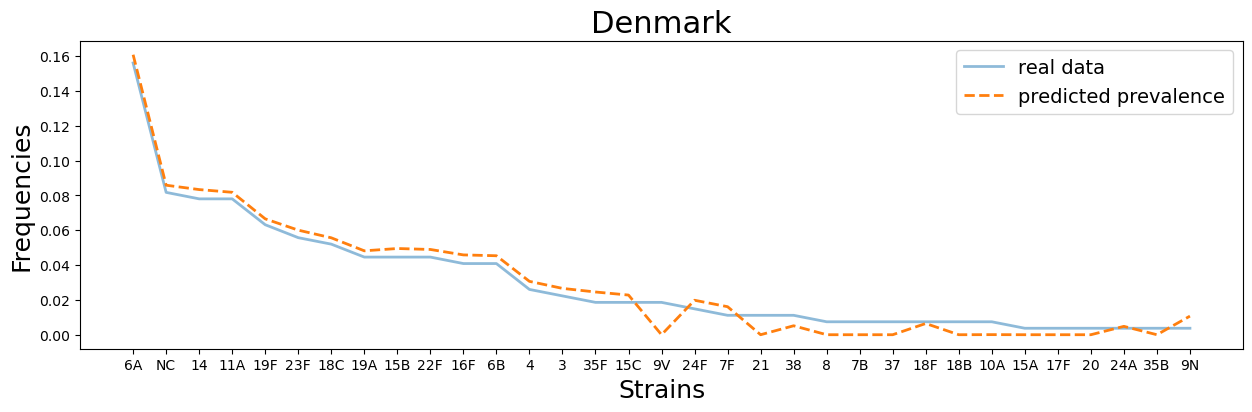

In [11]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Denmark.strain)

fig = plt.figure(figsize = (15, 4))
plt.plot(range_strain, Denmark_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Denmark', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()